### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 3
### Due: Saturday, Feb 10th at 11.59pm CST
---

## Only one problem this week

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw3_data_1.npy`. This is a (50 x 2) numpy array, with measurements in the first column and uncertainties in the second column. Using the analytic results for heteroscedastic Gaussian data from lectures, compute the sample mean and the standard error on the sample mean from for this data.

2) Reusing some approaches and tools from `Lecture_6`, write a ln-likelihood function for heteroscedastic Gaussian data, and use it in a fitting algorithm to find the best-fit mean. *Remember that scipy optimizers are set up to minimize functions.*

3) Using the same numerical technique from `Lecture_5`, compute the Fisher uncertainty estimate on the mean.

4) Using the bootstrap method, generate $1000$ bootstrap realizations of this dataset. *DO NOT use the `astroML` code. Write your own bootstrap function from scratch. Also recall that when resampling data, measurements and uncertainties should stay paired together.*

5) Repeat (2) with all $1000$ boostrap datasets to find the distribution of the sample mean. Plot a normalized histogram of these bootstrap means, and overplot a Gaussian pdf with the mean and std found in (1). Do these agree?

6) While we have fitted a heteroscedastic Gaussian to this data, let's try something else. Write some code to define a ln-likelihood for a Laplace distribution evaluated on this data. Fit simultaneously for the Laplace location parameter $\mu$ and scale parameter $\Delta$.

7) Compute the AIC values for the heteroscedastic Gaussian model and the Laplacian model. Which model is favored by the data?

8) Using the $1000$ bootstrap datasets from before, fit for the Laplacian $\mu$ and $\Delta$ for each. Make a nice `corner` plot of the distributions of $\mu$ and $\Delta$ that shows both the marginal $1$D distributions and the joint $2$D distribution. Make sure the plot has labels, shows the titles on each $1$D marginal panel, and has $68\%$ and $95\%$ levels.

9) Let's finish with a Fisher uncertainty estimate of the Laplacian parameters. Use the following code to install `numdifftools` which provides a simple way to compute derivatives. We can then compute the Hessian matrix, which is the matrix of the second derivatives of the user's function. This should be computed at the best-fit Laplacian parameters $\mu$ and $\Delta$. To finish, invert the matrix, and then take the square root. The diagonal entries will then be the Fisher uncertainties on $\mu$ and $\Delta$. How does these compare to the bootstrap distribution widths found in (8)?

In [182]:
!pip install numdifftools

In [4]:
import numdifftools as nd
H = nd.Hessian(f_lnlaplace)([beta_laplace[0], beta_laplace[1]])
sigma_laplace = np.linalg.inv(H)**0.5

NameError: name 'f_lnlaplace' is not defined

### Solution

Copilot is being used to make my the comments of my codes alottttt better

Part 1

In [194]:
# Import lib 
import numpy as np
from scipy import optimize
from scipy.stats import norm
import matplotlib.pyplot as plt



In [195]:
# Load the data from the .npy file
# The file is located in the relative path "../../homeworks/hw_data/hw3_data_1.npy"
data = np.load("../../homeworks/hw_data/hw3_data_1.npy")

# The data is assumed to be heteroscedastic Gaussian data
# We use the analytic results from lectures to compute the sample mean and the standard error on the sample mean

# Using measurements and uncertainties from the data array
U = data[:, 1]
M = data[:, 0]

# The sample mean is the sum of each data point divided by its variance, all divided by the sum of the reciprocals of the variances
sample_mean = np.sum(M / U**2) / np.sum(1 / U**2)

# The standard error is the square root of the sum of the reciprocals of the variances
std_err = np.sqrt(np.sum(1 / U**2))

# Print the calculated sample mean and standard error
print('Sample mean: ', sample_mean)
print('Standard error on sample mean:', std_err)

# Print measurements and uncertainties from the data array'
print('Mesurement: ' , M)
print('Uncertainites: ' , U)

Sample mean:  3.9179920346060557
Standard error on sample mean: 10.54731705149739
Mesurement:  [2.97207735 1.98824293 1.66981961 3.96519709 3.38541476 4.24894584
 3.69290063 4.33198366 2.49401178 1.89419429 2.04203146 4.15394176
 4.14130534 4.21256076 4.47047556 4.29385594 3.68668822 4.67658913
 3.66326255 3.86702391 4.15062285 5.10972749 4.16180633 4.04294769
 3.14447868 6.13017327 7.47431877 4.55226549 3.18937552 5.05068215
 2.58504832 3.2807617  3.15074159 4.68488632 6.58112816 2.8891109
 5.12723698 4.42150207 5.78739811 3.09099302 2.95001153 4.56778994
 5.18264257 2.84179256 4.39262812 4.04550675 5.61515858 4.30454563
 4.54079173 4.6024919  4.22466725 3.23519179 4.68671169 3.52982363
 3.91370395 2.45921984 4.24447507 3.14653177 5.33943461 4.03419177
 5.29661353 1.53762427 4.73684358 4.39143774 4.86001446 2.94239726
 4.77882139 2.20043281 4.65868995 3.06975053 4.27078305 5.45355937
 3.58302266 6.78259445 3.69313217 3.8625051  5.04842957 2.93330476
 4.26274594 4.09244224 3.10229518 3

SRT: Your final standard error on the mean should be inverted. This should be clear by inspection. -2 points.

Part 2

In [196]:
# Define the squared loss function for a Gaussian distribution
# This function calculates the chi-squared statistic, which is equivalent to -2 times the log-likelihood for a Gaussian distribution
def squared_loss(mu, xi, sigma):
    # The model is a constant mean value
    # The chi-squared statistic is the sum of the squared differences between the data and the model, weighted by the inverse of the data uncertainties
    return np.sum(((xi - mu) / sigma) ** 2, -1)

# Define a lambda function for the squared loss
# This function takes a single argument, test, which is an array of model parameters
# In this case, the only model parameter is the mean value
f_squared = lambda beta: squared_loss(beta[0], xi=M, sigma=U)

# Set an initial guess for the mean value
guess = 4

# Use scipy's fmin function to find the model parameters that minimize the squared loss
# The disp=False argument means that fmin will not print convergence messages
test_squared = optimize.fmin(f_squared, guess, disp=False)

# Print the best-fit mean value
print('Best fit mean: ', test_squared[0])

Best fit mean:  3.91796875


SRT: Good.

Part 3

In [197]:
# Define a grid of possible mean values
xgrid = np.linspace(1, 8, 1000)

# Initialize an empty list to store the sum of the log-probabilities for each mean value to compute the Fisher information
fisher_info = []

# Calculate the likelihood function at each point on the grid
# Loop over the possible mean values
for mu in xgrid:
    # Compute the log-probability of the data given the current mean value and uncertainties
    logpdf = norm.logpdf(M, loc=mu, scale=U)
    
    # Sum the log-probabilities and append the result to the list
    fisher_info.append(np.sum(logpdf))

# Convert the list of sums to a numpy array
L = np.array(fisher_info)

# Compute the second derivative of the log-likelihood with respect to the mean
# This is equivalent to the negative of the Fisher information
sig_mu_squared = -np.diff(L, n=2) / (xgrid[1] - xgrid[0])**2

# The Fisher uncertainty estimate is the square root of the inverse of the Fisher information
sig_mu = 1 / np.sqrt(sig_mu_squared)[0]

print("Fisher matrix error on estimated mean is %.3f" % sig_mu)

Fisher matrix error on estimated mean is 0.095


SRT: Great!

Part 4

In [198]:
# Define a function to generate bootstrap realizations of the dataset
def bootstrap_resample(M, U, num_samples=1000):
    """
    Generate bootstrap resamples of the dataset.

    Parameters:
    M (np.array): Measurements of the original dataset.
    U (np.array): Uncertainties of the original dataset.
    num_samples (int): Number of bootstrap samples to generate.

    Returns:
    list of np.array: Bootstrap samples of measurements and uncertainties.
    """
    # Get the number of data points
    n = len(M)

    # Initialize lists to store the bootstrap samples
    bootstrap_meas = []
    bootstrap_uncert = []

    # Generate the bootstrap samples
    for _ in range(num_samples):
        # Generate a random sample of indices, with replacement
        indices = np.random.choice(range(n), size=n, replace=True)

        # Select the corresponding measurements and uncertainties
        bootstrap_meas.append(M[indices])
        bootstrap_uncert.append(U[indices])

    return bootstrap_meas, bootstrap_uncert

# Generate 1000 bootstrap realizations of the dataset
bootstrap_meas, bootstrap_uncert = bootstrap_resample(M, U, 1000)

# Print the first bootstrap realization of the measurements and uncertainties
print('Bootstrap measurements:')
print(bootstrap_meas[0])
print('Bootstrap uncertainties:')
print(bootstrap_uncert[0])

Bootstrap measurements:
[5.04842957 4.81515552 2.49401178 3.69290063 1.53762427 5.12723698
 4.54079173 3.67446241 5.78739811 4.7044181  5.29661353 3.69313217
 4.94178893 3.18937552 1.89419429 2.49401178 2.94239726 3.8625051
 2.97207735 3.15810998 3.69290063 5.78739811 5.05068215 3.19879973
 4.14130534 3.46562245 2.84179256 5.33943461 2.49401178 3.13482852
 3.68668822 2.58504832 1.89419429 3.23519179 1.35147524 3.2807617
 4.67658913 4.56778994 4.7044181  5.33943461 5.021566   2.84179256
 5.05068215 4.39143774 4.73684358 3.38541476 4.47047556 3.22028372
 3.15074159 4.68488632 4.68488632 4.10135768 4.68488632 4.09244224
 3.52982363 4.22466725 4.68488632 4.67658913 5.04842957 5.45355937
 3.52982363 6.13017327 4.24894584 3.2807617  3.22028372 3.38541476
 5.04842957 3.38541476 3.28702062 4.55226549 1.53762427 3.58302266
 2.8891109  4.03419177 1.35147524 3.46562245 3.8625051  1.66981961
 4.39143774 3.66326255 4.24894584 2.45921984 4.07784029 2.04203146
 3.68668822 4.24894584 7.47431877 4.4215

SRT: Great!

Part 5

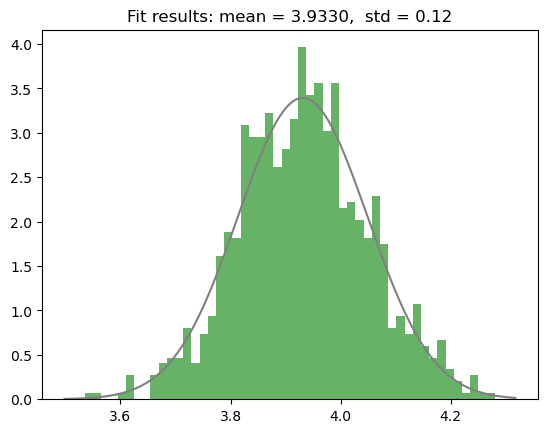

In [199]:
# Define the squared loss function for a Gaussian distribution
def squared_loss(mu, xi, sigma):
    return np.sum(((xi - mu) / sigma) ** 2)

# Define a lambda function for the squared loss
f_squared = lambda test: squared_loss(test[0], xi=bootstrap_means, sigma=bootstrap_std)

# Set an initial guess for the mean value
""" The fmin function, used in optimize, uses a method called the downhill simplex algorithm. This algorithm 
is not sensitive to the intial guess, especially for well-behaved functions like the squared loss function for 
a Gaussian distribution."""

guess = [5]

# Use scipy's fmin function to find the model parameters that minimize the squared loss
test_squared = optimize.fmin(f_squared, guess, disp=False)

# Calculate the mean of each bootstrap sample
bootstrap_means = [np.mean(m) for m in bootstrap_meas]

# Calculate the mean and std of the bootstrap means
bootstrap_mean = np.mean(bootstrap_means)
bootstrap_std = np.std(bootstrap_means)

# Plot a normalized histogram of bootstrap means
plt.hist(bootstrap_means, bins=50, density=True, alpha=0.6, color='g')

# Overplot a Gaussian pdf with the mean and std of the bootstrap means
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
dist = norm(test_squared[0], bootstrap_std)
plt.plot(x, dist.pdf(x), c='gray')
plt.title("Fit results: mean = %.4f,  std = %.2f" % (bootstrap_mean, bootstrap_std))

plt.show()

SRT: Good, but you avoided comparing with (1) because the error on the mean in (1) was incorrect. Although your Fisher estimate of the error on the mean in (2) was correct! -2 points.

Part 6

In [200]:
from scipy.stats import laplace
from scipy.optimize import fmin

# Define the negative log-likelihood for a Laplace distribution
def laplace_likelihood(mu, delta, xi):
    # The model parameters are mu and delta
    likelihood = laplace.logpdf(xi, loc=mu, scale=delta)
    # We use a negative sign because optimize finds the function minimum, but we want to maximize the log-likelihood
    return -np.sum(likelihood)

# Lambda function for the Laplace likelihood
f_laplace = lambda scale_v : laplace_likelihood(scale_v[0], scale_v[1], xi=M)
print(test_laplace)

# Initial guess for mu and delta
guess = [4, 1]

# Use scipy's fmin function to find the parameters that minimize the negative log-likelihood
test_laplace = fmin(f_laplace, guess, disp=False)

# Print the best-fit parameters
print('Best-fit location parameter: ', test_laplace[0])
print('Best-fit scale parameter: ', test_laplace[1])

[4.08692055 0.88226923]
Best-fit location parameter:  4.088288159375196
Best-fit scale parameter:  0.8822692335377051


SRT: Good!

part 6

In [205]:
def AIC(L_0, k, N):
    """
    Compute the Akaike Information Criterion (AIC).

    Parameters:
    L_0 (float): The maximum log-likelihood.
    k (int): The number of parameters in the model.
    N (int): The number of data points.

    Returns:
    float: The AIC.
    """
    aic = -2 * L_0 + 2 * k + 2 * k * (k + 1) / (N - k - 1)
    return aic

# Compute the AIC for the Gaussian model
# We take the negative of the log-likelihood because we minimized the negative log-likelihood earlier
AIC_gaussian = AIC(-squared_loss(test_squared[0], M, U), 1, len(M))

# Compute the AIC for the Laplacian model
AIC_laplace = AIC(-laplace_likelihood(test_laplace[0], test_laplace[1], M), 2, len(M))

# Print the AIC for both models
print('AIC for Gaussian: ', AIC_gaussian)
print('AIC for Laplacian: ', AIC_laplace)

AIC for Gaussian:  174.72904199935144
AIC for Laplacian:  317.7015436933863


Part 8

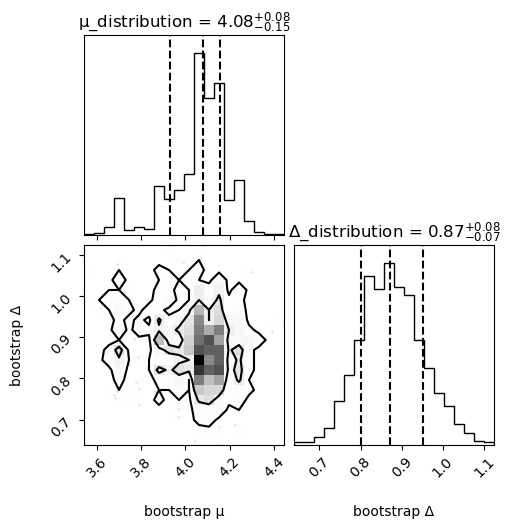

In [189]:
import numpy as np
from scipy.stats import laplace
from scipy.optimize import fmin
import matplotlib.pyplot as plt
import corner

"""
Based on the code from the previous exercise, we can use the bootstrap method to estimate the uncertainty in the parameters of the Laplace distribution.
After Steve said maybe making the bootstrap function again and only return the things that is needed for the corner plot, I made the function again.
"""

def bootstrap(data, resample=1000):
    """Generate bootstrap resamples of the data."""
    n = len(data)
    return [data[np.random.choice(n, n, replace=True)] for _ in range(resample)]

def laplace_likelihood(params, data):
    """Negative log-likelihood for the Laplace distribution."""
    mu, delta = params
    return -np.sum(laplace.logpdf(data, loc=mu, scale=delta))

def fit_laplace(data):
    """Fit a Laplace distribution to the data."""
    initial_guess = [1, 1]
    return fmin(laplace_likelihood, initial_guess, args=(data,), disp=False)

def main():
    # Generate bootstrap resamples
    bootstrap_samples = bootstrap(M)

    # Fit a Laplace distribution to each resample
    parameters = np.array([fit_laplace(sample) for sample in bootstrap_samples])

    # Separate the parameters into two arrays for plotting
    mu_values, delta_values = parameters.T

    # Combine the mu_values and delta_values into a 2D array
    data = np.vstack([mu_values, delta_values]).T

    # Create the corner plot
    figure = corner.corner(data, quantiles=(0.16, 0.5, 0.84), levels=(0.68, 0.95), 
                           labels=['bootstrap μ', 'bootstrap Δ'],
                           titles=['μ_distribution', 'Δ_distribution'],
                           show_titles=True)

    # Display the plot
    plt.show()
main()

SRT: This is terrific!

In [185]:
import numdifftools as nd
H = nd.Hessian(f_laplace)([test_laplace[0], test_laplace[1]])
# invert the matrix and take square root
sigma_laplace = np.linalg.inv(H)**0.5

print(sigma_laplace)
print('\nstd of bootstrap μ: '+str(np.std(delta_values))+'\nstd of bootstrap Δ: '+str(np.std(mu_values)))

[[0.10922764 0.00498758]
 [0.00498758 0.08822722]]

std of bootstrap μ: 0.07791900156467535
std of bootstrap Δ: 0.12911460956023418


SRT: Correct Hessian calculation.